# Link Prediction on KG-IDG

## Setup

In [7]:
# Yes, this is messy, but GraPE is not part of the rest of this project.
!poetry install
!pip install grape
import grape
from grape import Graph

Installing dependencies from lock file

No dependencies to install or update

Installing the current project: kg-idg (0.0.2)Installing the current project: kg-idg (0.0.2)


## Load the KG-IDG Graph

In [ ]:
# Change graph directory as needed.
path_to_graph_directory = "../data/merged/20230101/"

In [ ]:
# This may not be necessary if the graph is already available.
!wget -P {path_to_graph_directory} https://kg-hub.berkeleybop.io/kg-idg/20230101/KG-IDG.tar.gz

In [4]:
# Verify contents of the nodes and edges.
!head {path_to_graph_directory}merged-kg*.tsv

==> ../data/merged/20230101/merged-kg_edges.tsv <==
id	subject	predicate	object	category	relation	provided_by	coexpression	coexpression_transferred	combined_score	cooccurence	database	database_transferred	description	experiments	experiments_transferred	fusion	has_attribute	has_evidence	homology	knowledge_source	neighborhood	neighborhood_transferred	source	textmining	textmining_transferred	type
urn:uuid:e8b60fee-1d25-4024-affe-3cb9381e8a5a	ENSEMBL:ENSP00000000233	biolink:interacts_with	ENSEMBL:ENSP00000272298		RO:0002434		0	62	490	332	0	0		0	181	0			0	Graph	0	0		0	125	biolink:Association
urn:uuid:d9139863-bd4c-49dc-8a0a-9bd67ba8ad23	ENSEMBL:ENSP00000000233	biolink:interacts_with	ENSEMBL:ENSP00000418915		RO:0002434		0	61	606	0	0	0		0	158	0			0	Graph	0	0		542	0	biolink:Association
urn:uuid:293a6827-0f2b-48fe-97ca-e013d98c7972	ENSEMBL:ENSP00000000233	biolink:interacts_with	ENSEMBL:ENSP00000356737		RO:0002434		0	0	418	0	0	0		0	0	0			0	Graph	0	0		419	0	biolink:Association
urn:uuid:7a5b1336-0

In [8]:
# Check on the available node embedding methods.
grape.get_available_models_for_node_embedding()

,model_name,task_name,library_name,available,requires_node_types,can_use_node_types,requires_edge_types,can_use_edge_types,requires_edge_weights,can_use_edge_weights,requires_positive_edge_weights
0,SocioDim,Node Embedding,Ensmallen,True,False,False,False,False,False,False,False
2,DeepWalk GloVe,Node Embedding,Ensmallen,True,False,True,False,True,False,True,True
3,Degree-based WINE,Node Embedding,Ensmallen,True,False,False,False,False,False,False,False
4,Structured Embedding,Node Embedding,Ensmallen,True,False,False,True,True,False,False,False
6,GLEE,Node Embedding,Ensmallen,True,False,False,False,False,False,False,False
8,Score-based WINE,Node Embedding,Ensmallen,True,False,False,False,False,False,False,False
9,Node2Vec CBOW,Node Embedding,Ensmallen,True,False,True,False,True,False,True,True
11,Second-order LINE,Node Embedding,Ensmallen,True,False,False,False,False,False,False,False
13,Walklets GloVe,Node Embedding,Ensmallen,True,False,True,False,True,False,True,True
14,Walklets CBOW,Node Embedding,Ensmallen,True,False,True,False,True,False,True,True


In [9]:
nodepath = path_to_graph_directory + 'merged-kg_nodes.tsv'
edgepath = path_to_graph_directory + 'merged-kg_edges.tsv'

In [10]:
graph_version = "20230101"
graph_name = f"KG-IDG {graph_version}"
print(graph_name)
g = Graph.from_csv(
      directed=True,
      node_path=nodepath,
      edge_path=edgepath,
      verbose=True,
      nodes_column='id',
      node_list_node_types_column='category',
      default_node_type='biolink:NamedThing',
      sources_column='subject',
      destinations_column='object',
      edge_list_edge_types_column='predicate',
      name=graph_name
    )

KG-IDG 20230101


In [11]:
g

<div class="graph-report"><style>.graph-report li {margin: 0.5em 0 0.5em 0;}.graph-report .paragraph {text-align: justify;word-break: break-all;}.graph-report .small-columns {column-count: 4;column-gap: 2em;}.graph-report .medium-columns {column-count: 3;column-gap: 2em;}.graph-report .large-columns {column-count: 2;column-gap: 2em;}.graph-report .single-column {}@media only screen and (max-width: 600px) {.graph-report .small-columns {column-count: 1;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 600px) and (max-width: 800px) {.graph-report .small-columns {column-count: 2;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 800px) and (max-width: 1024px) {.graph-report .small-columns {column-count: 3;}.graph-report .medium-columns {column-count: 2;}.graph-report .large-columns {column-count: 1;}}</style><h2>KG-IDG 20230101</h2><p class="paragraph">The directed multigraph KG-IDG 20230101 has 560.29K heterogeneous nodes and 4.43M heterogeneous edges. The RAM requirements for the nodes and edges data structures are 65.15MB and 22.21MB respectively.</p><h3 style="margin: 1em 0 0 0;">Degree centrality</h3><p class="paragraph">The minimum node degree is 0, the maximum node degree is 6.00K, the mode degree is 1, the mean degree is 7.91 and the node degree median is 1.</p><p class="paragraph">The nodes with the highest degree centrality are <a href='https://www.ebi.ac.uk/chebi/searchId.do?chebiId=CHEBI:30616' target='_blank' title='Go to CHEBI to get more informations about CHEBI:30616'>CHEBI:30616</a> (degree 6.00K and node type <a href='https://biolink.github.io/biolink-model/docs/ChemicalSubstance|biolinkChemicalEntity.html' target='_blank' title='Go to BioLink to get more informations about biolink:ChemicalSubstance|biolink:ChemicalEntity'>biolink:ChemicalSubstance|biolink:ChemicalEntity</a>), <a href='https://www.ebi.ac.uk/chebi/searchId.do?chebiId=CHEBI:456216' target='_blank' title='Go to CHEBI to get more informations about CHEBI:456216'>CHEBI:456216</a> (degree 5.43K and node type <a href='https://biolink.github.io/biolink-model/docs/ChemicalSubstance|biolinkChemicalEntity.html' target='_blank' title='Go to BioLink to get more informations about biolink:ChemicalSubstance|biolink:ChemicalEntity'>biolink:ChemicalSubstance|biolink:ChemicalEntity</a>), <a href='https://www.ebi.ac.uk/chebi/searchId.do?chebiId=CHEBI:15377' target='_blank' title='Go to CHEBI to get more informations about CHEBI:15377'>CHEBI:15377</a> (degree 4.48K and node type <a href='https://biolink.github.io/biolink-model/docs/ChemicalSubstance|biolinkChemicalEntity.html' target='_blank' title='Go to BioLink to get more informations about biolink:ChemicalSubstance|biolink:ChemicalEntity'>biolink:ChemicalSubstance|biolink:ChemicalEntity</a>), <a href='https://www.ensembl.org/Gene/Summary?g=ENSP00000229239' target='_blank' title='Go to ENSEMBL to get more informations about ENSEMBL:ENSP00000229239'>ENSEMBL:ENSP00000229239</a> (degree 2.79K and node type <a href='https://biolink.github.io/biolink-model/docs/Protein|biolinkNamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:Protein|biolink:NamedThing'>biolink:Protein|biolink:NamedThing</a>) and <a href='https://www.ensembl.org/Gene/Summary?g=ENSP00000451828' target='_blank' title='Go to ENSEMBL to get more informations about ENSEMBL:ENSP00000451828'>ENSEMBL:ENSP00000451828</a> (degree 2.78K and node type <a href='https://biolink.github.io/biolink-model/docs/Protein|biolinkNamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:Protein|biolink:NamedThing'>biolink:Protein|biolink:NamedThing</a>).</p><h3 style="margin: 1em 0 0 0;">Node types</h3><p class="paragraph">The graph has 39 node types, of which the 10 most common are <a href='https://biolink.github.io/biolink-model/docs/Ch

## Build and Evaluate Node Embeddings

In [12]:
from grape.embedders import FirstOrderLINEEnsmallen
from grape import GraphVisualizer
import pandas as pd
import os

/home/harry/kg-idg/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:841: FutureWarning: The parameter `square_distances` has not effect and will be removed in version 1.3.
  warnings.warn(
/home/harry/kg-idg/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:841: FutureWarning: The parameter `square_distances` has not effect and will be removed in version 1.3.
  warnings.warn(


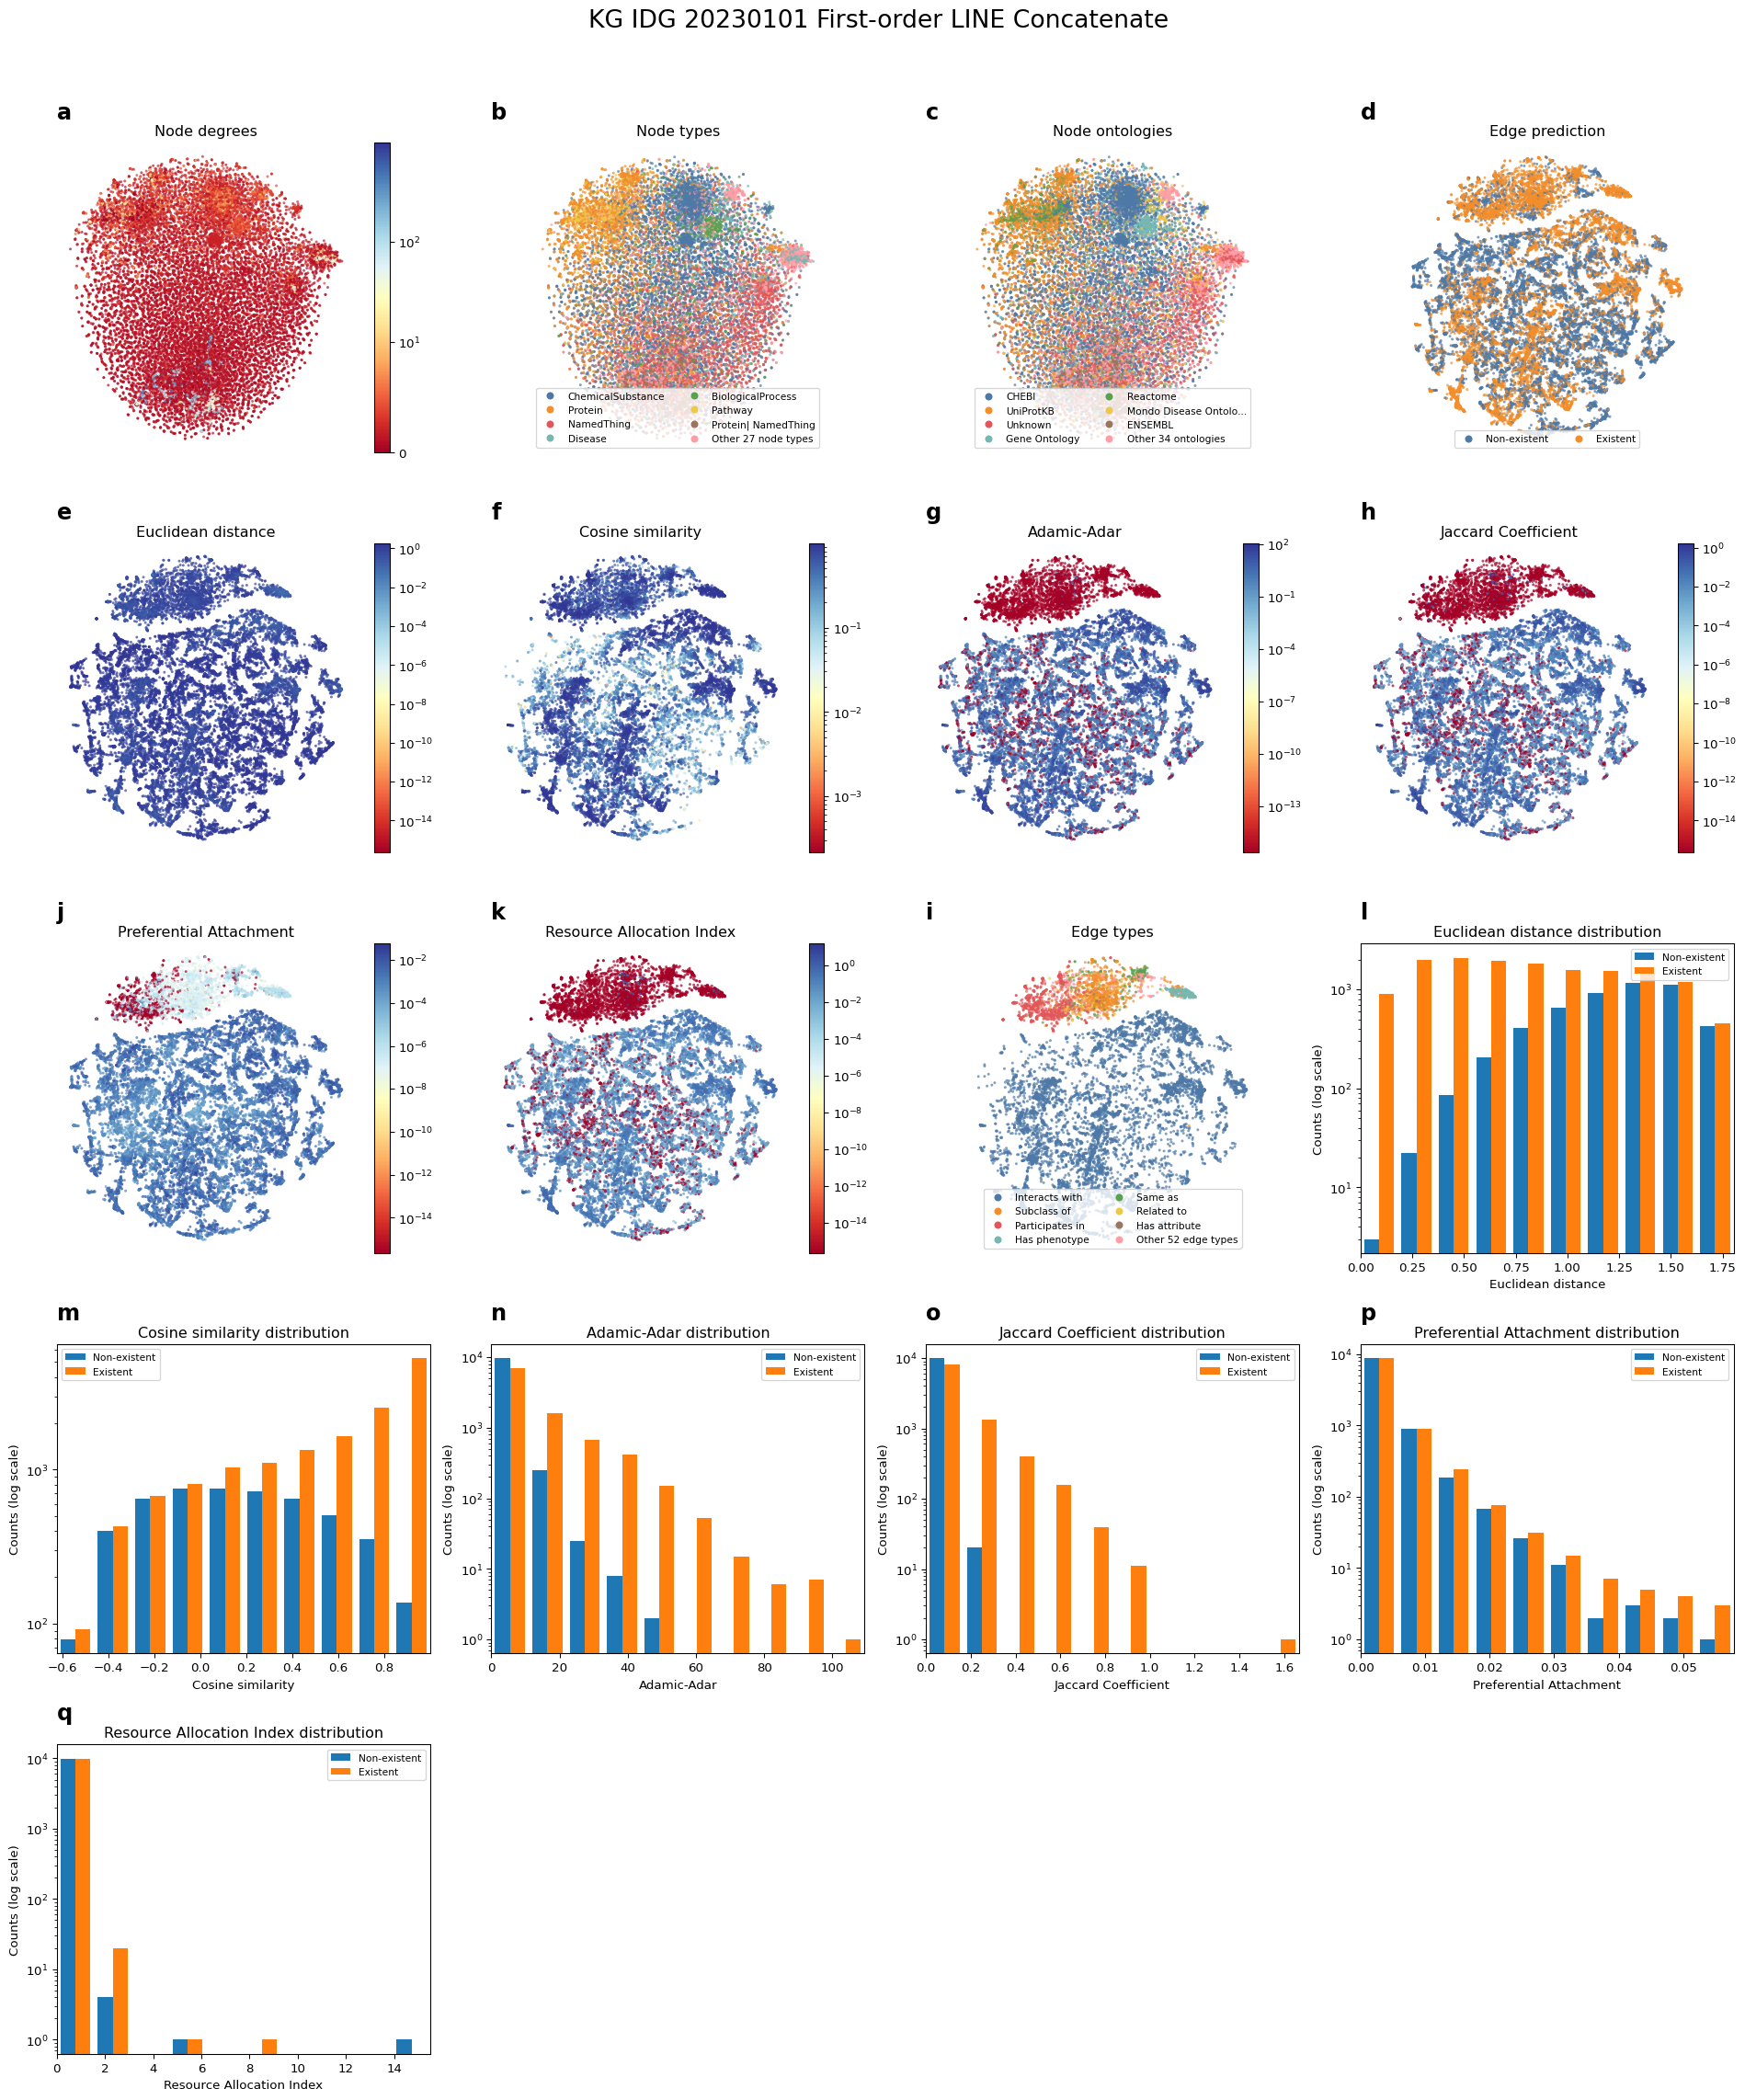

In [13]:
# This won't produce terribly useful embeddings for KG-IDG with default parameters,
# but it's fast.

embed_type = "FirstOrderLINEEnsmallen"
model = FirstOrderLINEEnsmallen()
    
g = g.remove_disconnected_nodes()

embedding = model.fit_transform(g)

visualizer = GraphVisualizer(g)

embedding_outfilename = g.get_name() + f"_{embed_type}_embed.csv"

visualizer.fit_and_plot_all(embedding)

raw_embedding = embedding.get_node_embedding_from_index(0)

raw_embedding.to_csv(embedding_outfilename, header=False)